In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("ev_charging_stations_india.csv")






**DATA CLEANING**

In [2]:
df.isna().any()
df.isna().sum()
df.dropna(subset=['lattitude','longitude'],inplace=True)
df.isna().sum()
df.rename(columns={'lattitude': 'latitude'}, inplace=True)
df.isna().any()
df['type']=pd.to_numeric(df['type'],errors='coerce')
df['type']=df.rename(columns={'type':'kw'},inplace=True)
df.pop('type')
df.isna().sum()
df['kw'].fillna(df['kw'].median(), inplace=True)

C:\Users\Dhananjay\AppData\Local\Temp\ipykernel_11288\2641752931.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['kw'].fillna(df['kw'].median(), inplace=True)


In [3]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df.drop(columns=['name','address'],inplace=True)


In [4]:
df['state'].value_counts()

state
Maharashtra          220
Delhi                124
Karnataka            124
Tamil Nadu           112
Kerala                78
Uttar Pradesh         76
Telangana             66
Gujarat               60
Haryana               56
Rajasthan             55
Delhi NCR             48
West Bengal           43
Andhra Pradesh        31
Odisha                26
Andhra pradesh        24
TAMIL NADU            20
Uttarakhand           18
Punjab                15
Jharkhand             15
Madhya Pradesh        15
Chhattisgarh          11
PUNJAB                 9
Goa                    8
TamilNadu              7
Bihar                  7
Assam                  6
Himachal Pradesh       6
Maharashra             5
TELENGANA              5
Chattisgarh            4
WestBengal             3
Jammu                  3
Jammu & Kashmir        3
Puducherry             2
Uttrakhand             2
Chandigarh             2
Andra Pradesh          2
Uttarakhand            2
chattisgarh            2
AndhraPradesh      

In [5]:
df['state']=df['state'].astype(str).str.title().str.strip()
df['state'].value_counts()

state
Maharashtra          220
Tamil Nadu           132
Karnataka            124
Delhi                124
Kerala                78
Uttar Pradesh         76
Telangana             66
Gujarat               60
Andhra Pradesh        56
Haryana               56
Rajasthan             55
Delhi Ncr             48
West Bengal           43
Odisha                26
Punjab                24
Uttarakhand           20
Jharkhand             15
Madhya Pradesh        15
Chhattisgarh          11
Goa                    8
Bihar                  7
Tamilnadu              7
Assam                  6
Chattisgarh            6
Himachal Pradesh       6
Maharashra             5
Telengana              5
Jammu                  3
Westbengal             3
Jammu & Kashmir        3
Uttrakhand             2
Chandigarh             2
Andra Pradesh          2
Puducherry             2
Hyderabadu00A0         1
Harayana               1
Pondicherry            1
Jammu And Kashmir      1
Bhubhaneswar           1
Sikkim             

In [6]:
df['state'].replace({

    'Karala': 'Kerala',
    'Maharashra': 'Maharashtra',
    'Telengana': 'Telangana',
    'Taminadu': 'Tamil Nadu',
    'Tamilnadu': 'Tamil Nadu',
    'Tami Nadu': 'Tamil Nadu',
    'Tami Nadu ': 'Tamil Nadu',
    'Tami Nadu ': 'Tamil Nadu',
    'Tami Nadu': 'Tamil Nadu',
    'Tamil Nadu ': 'Tamil Nadu',
    'TAMIL NADU': 'Tamil Nadu',
    'Andhra Pradesh ': 'Andhra Pradesh',
    'Andhra Pradesh': 'Andhra Pradesh',
    'Andhra Pradesh ': 'Andhra Pradesh',
    'Andhrapradesh': 'Andhra Pradesh',
    'Andra Pradesh': 'Andhra Pradesh',
    'Andra Pradesh ': 'Andhra Pradesh',
    'Andhra Pradesh ': 'Andhra Pradesh',
    'Andaman ': 'Andaman And Nicobar Islands',
    'Andaman': 'Andaman And Nicobar Islands',
    'Delhi Ncr': 'Delhi',
    'Delhi Ncr ': 'Delhi',
    'Chattisgarh': 'Chhattisgarh',
    'Chattisgargh': 'Chhattisgarh',
    'Uttrakhand': 'Uttarakhand',
    'Uttarkhand': 'Uttarakhand',
    'Uttrakhand': 'Uttarakhand',
    'Harayana': 'Haryana',
    'Pondicherry': 'Puducherry',
    'Puducherry ': 'Puducherry',
    'Jammu And Kashmir': 'Jammu & Kashmir',
    'Jammu': 'Jammu & Kashmir',
    'Westbengal': 'West Bengal',
    'West Bengal ': 'West Bengal'
}, inplace=True)


C:\Users\Dhananjay\AppData\Local\Temp\ipykernel_11288\2880140738.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['state'].replace({


In [7]:
df['state'].replace({
    'Ernakulam': 'Kerala',
    'Kochi': 'Kerala',
    'Hyderabad': 'Telangana',
    'Hyderabadu00A0': 'Telangana',
    'Rajahmundry': 'Andhra Pradesh',
    'Jajpur': 'Odisha',
    'Bhubhaneswar': 'Odisha',
    'Hisar': 'Haryana',
    'Limbdi': 'Gujarat',
    'Chikhali': 'Maharashtra',
    'Pondicherry': 'Puducherry'
}, inplace=True)
df['state'].value_counts()


state
Maharashtra                    226
Delhi                          172
Tamil Nadu                     140
Karnataka                      124
Kerala                          81
Uttar Pradesh                   76
Telangana                       73
Gujarat                         61
Andhra Pradesh                  60
Haryana                         58
Rajasthan                       55
West Bengal                     46
Odisha                          28
Punjab                          24
Uttarakhand                     23
Chhattisgarh                    17
Jharkhand                       15
Madhya Pradesh                  15
Goa                              8
Jammu & Kashmir                  7
Bihar                            7
Himachal Pradesh                 6
Assam                            6
Puducherry                       3
Chandigarh                       2
Sikkim                           1
Tripura                          1
Andaman And Nicobar Islands      1
Name: count, d

In [8]:
df_counts = df['state'].value_counts().reset_index()
df_counts.columns = ['state', 'station_count']



**VISUALIZATION**

{'whiskers': [<matplotlib.lines.Line2D at 0x1fa24252fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa24264510>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa242525d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa24265b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa24266490>],
 'means': []}

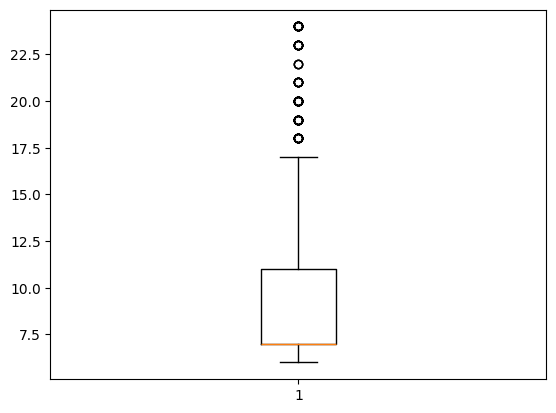

In [9]:
plt.boxplot(df['kw'])

outliers are dc fast chargers not errors

In [10]:
df

,state,city,latitude,longitude,kw
0,Haryana,Gurugram,29.6019,76.980300,12.0
1,Haryana,Gurugram,28.4673,77.081800,12.0
2,Rajasthan,Behror,27.8751,76.276000,12.0
3,Uttar Pradesh,Khatauli,29.3105,77.721800,12.0
4,Uttar Pradesh,Khatauli,29.3105,77.721800,12.0
...,...,...,...,...,...
1542,Kerala,Munnar,10.0297934,77.045859,7.0
1543,Haryana,Gurgaon,28.3904593,76.959200,7.0
1544,Haryana,Gurgaon,28.411072,77.040546,7.0
1545,Jammu & Kashmir,Jammu,32.7064117,74.879203,7.0


In [11]:
grp=df.groupby('state')
data=pd.DataFrame(grp['kw'].mean())
data =data.rename(columns={'kw':'average_kw'})
data1=data.reset_index()
print(data1.head())
data1=data1.sort_values(by='average_kw',ascending=False)
print(data1.head(10))

                         state  average_kw
0  Andaman And Nicobar Islands    7.000000
1               Andhra Pradesh    8.133333
2                        Assam    7.000000
3                        Bihar    6.571429
4                   Chandigarh    6.000000
               state  average_kw
13         Karnataka   11.346774
10  Himachal Pradesh   11.166667
9            Haryana   10.568966
22        Tamil Nadu   10.385714
23         Telangana   10.109589
14            Kerala    9.864198
8            Gujarat    9.295082
16       Maharashtra    8.623894
7                Goa    8.500000
6              Delhi    8.244186


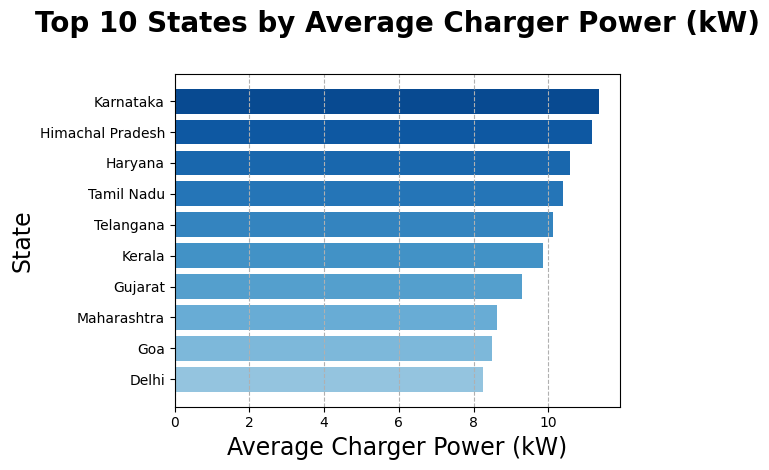

In [12]:
plt.barh(data1['state'][:10][::-1], data1['average_kw'][:10][::-1], color=plt.cm.Blues(np.linspace(0.4,0.9,10)))
plt.xlabel("Average Charger Power (kW)",fontsize=17)
plt.ylabel("State",fontsize=17)
plt.title("Top 10 States by Average Charger Power (kW)",fontsize=20, fontweight='bold', pad=30)
plt.tight_layout()
plt.grid(axis='x', linestyle='--')
plt.show()


In [13]:
def classify_speed(kw):
    if kw <= 7.4:
        return 'Slow (≤7.4 kW)'
    elif 7.4 < kw <= 22:
        return 'AC Fast (7.4–22 kW)'
    else:
        return 'DC Fast (>22 kW)'

df['speed_class'] = df['kw'].apply(classify_speed)
type_counts = df['speed_class'].value_counts()

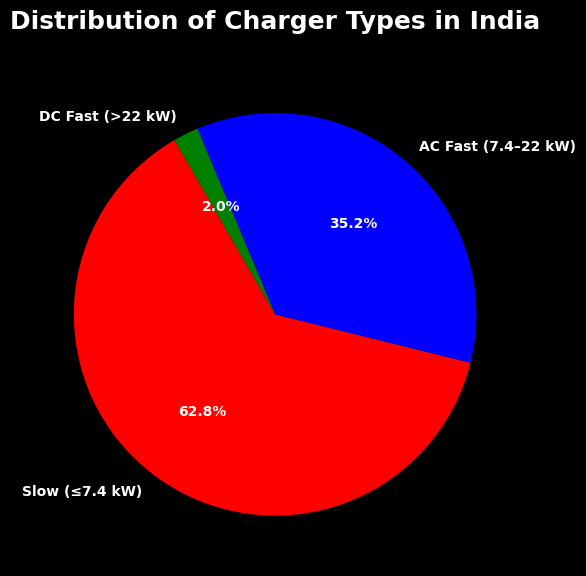

In [14]:
plt.figure(figsize=(6,6),facecolor='black')
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    
textprops={'color':'white', 'fontsize':10, 'weight':'bold'},
colors=['red','blue','green'],
startangle=120,
)
plt.title("Distribution of Charger Types in India", fontsize=18, fontweight='bold', pad=25,color='white')
plt.tight_layout()
plt.show()

state
Maharashtra       226
Delhi             172
Tamil Nadu        140
Karnataka         124
Kerala             81
Uttar Pradesh      76
Telangana          73
Gujarat            61
Andhra Pradesh     60
Haryana            58
Name: count, dtype: int64


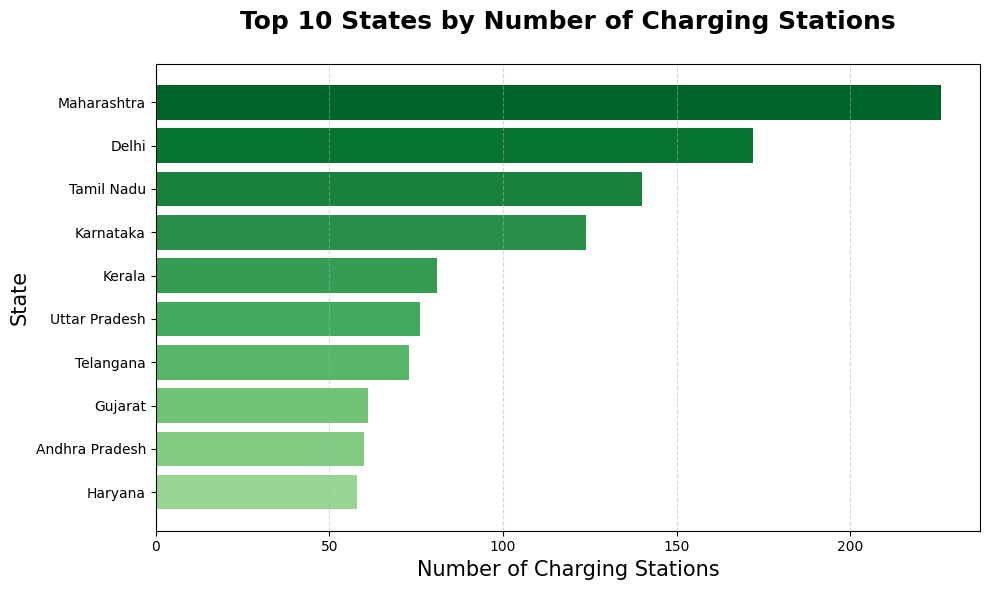

In [15]:
state_counts = df['state'].value_counts().head(10)
print(state_counts)

plt.figure(figsize=(10,6))
plt.barh(
    state_counts.index[::-1],
    state_counts.values[::-1],
    color=plt.cm.Greens(np.linspace(0.4, 0.9, 10))
)

plt.xlabel("Number of Charging Stations", fontsize=15)
plt.ylabel("State", fontsize=15)
plt.title("Top 10 States by Number of Charging Stations", fontsize=18, fontweight='bold', pad=25)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


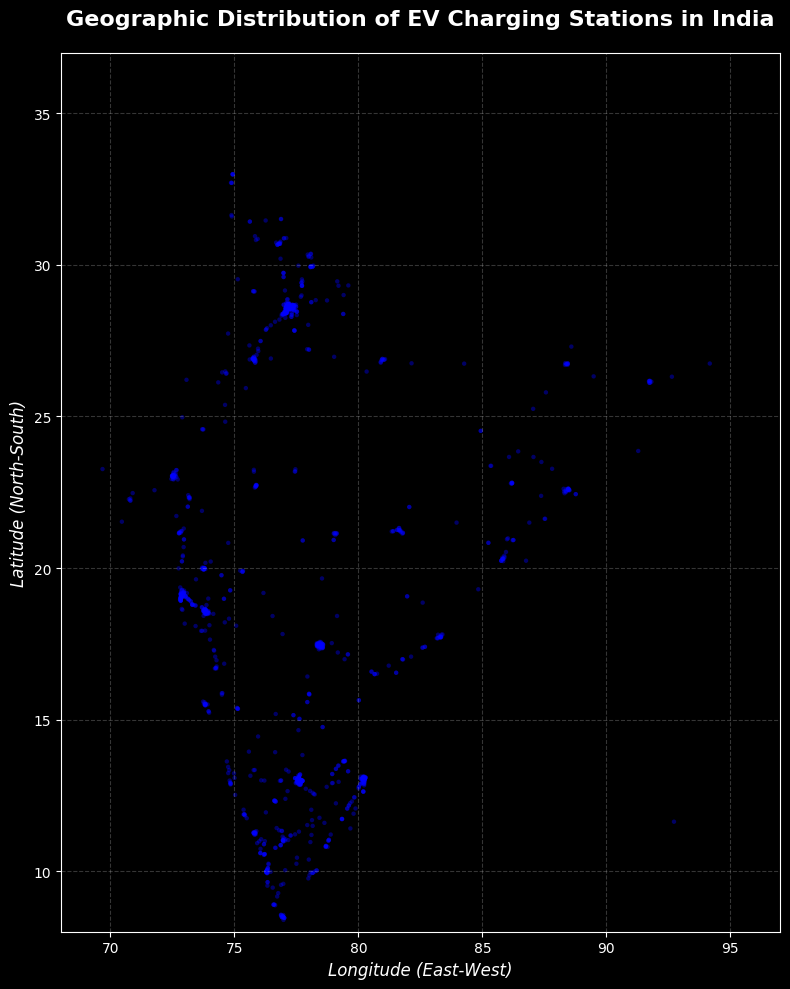

In [16]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
plt.figure(figsize=(8,10), facecolor='black')
plt.scatter(
    df['longitude'], df['latitude'],
    s=10, alpha=0.4, color='blue', edgecolors='none'
)
plt.xlim(68, 97)
plt.ylim(8, 37)
plt.title("Geographic Distribution of EV Charging Stations in India", fontsize=16, fontweight='bold', pad=20, color='white')
plt.xlabel("Longitude (East-West)", fontsize=12, color='white',fontstyle='italic')
plt.ylabel("Latitude (North-South)", fontsize=12, color='white',fontstyle='italic')
plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().set_facecolor('black')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color('white')          # make borders visible
ax.tick_params(colors='white')  
plt.tight_layout()
plt.show()


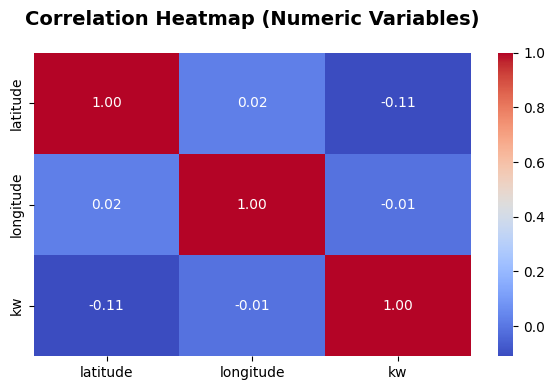

In [17]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Numeric Variables)", fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


In [18]:
df.to_csv("cleaned_ev_charging_stations.csv", index=False)
plt.savefig("ev_station_distribution.png", dpi=300, facecolor='black')



<Figure size 640x480 with 0 Axes>

**CONCLUSION:**

After working on the dataset of EV charging stations across India using Python,NumPy,Pandas,Seaborn and Matplotlib,I was able to clean,analyze and visualize the data to understand how the EV charging network is growing across the country.

From the analysis,I noticed that Maharashtra,Delhi and Karnataka have the highest number of charging stations,showing strong support for electric vehicles in those regions.
Kerala and Tamil Nadu are also catching up fast with good growth in their charging networks.

When I looked into the charger power (kW),it was clear that:

* Most chargers (around 63%) are slow chargers up to 7.4 kW

* Around 35% are AC fast chargers (7.4–22 kW)

* Only about 2% are DC fast chargers above 22 kW.

This shows that India still needs to improve its fast-charging infrastructure, especially for long-distance travel.

I also found that the average charger power is higher in big cities and industrial states like Delhi,Maharashtra and Tamil Nadu,which means metro regions currently have better EV infrastructure.
Most charging stations are concentrated in southern and western India,while central and northeastern areas still have very few.

From the correlation analysis,there wasn’t any strong numerical link between location and charger power.
This means that charger speed mainly depends on infrastructure and investment, not geography.

Overall,the project gave me a clear idea that India’s EV charging network is growing quickly but unevenly.

To move forward,the focus should be on:

* Increasing the number of DC fast chargers and

* Expanding the network into less-developed regions so that EV adoption can spread evenly across the country.